<a href="https://colab.research.google.com/github/intandeay/Applied-Data-Science-Capstone-Project/blob/main/Coffee_Shop_Business_Analysis_with_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. Introduction (Business Problem)



Coffee shop is one place that people can go to, whether for quick refreshment, truly enjoying the coffee, or becoming temporary workspace for individuals. 

According to the [research](https://nowjakarta.co.id/dining/culinary-talk/the-emerging-business-of-coffee-shops-in-indonesia) by Toffin and MIX MarComm SWA Media Group magazine, the number of coffee shops in Indonesia has reached 2,950 in 2019, which was 3x compared to 2016. This phenomenon was drived by many factors, such as presence of social media than eases promotion, existence of ride hailing platforms that can ease customers to purchase via delivery, increasing purchasing powers, and new culture of hanging out among youngsters in Indonesia.

Businessmen and women who are interested in building new brands of coffee shop, or franchise, should assess every aspect thoroughly as a part of business plan, so the business can profit as much as possible. One aspect that can affect the profit is the location. Building coffee shops in a region full of competitors can be tough, so one can opt to strategize by opting regions with a greater number of populations yet a smaller number of rivals.

Bandung, as now populated by 2.5 million of people, is now the 4th most populated cities in Indonesia, having no exception to this increasing trend of coffee shops. This assignment is for businessmen or women who are interested in building new brand of coffee shops or expanding their brands in Bandung. To summarize, where should someone/a company have a new branch/make new local brand of coffee shop in Bandung?

# II. Data


First Data is taken from [Open Data Kota Bandung](http://data.bandung.go.id/dataset/jumlah-penduduk-berdasarkan-kelompok-umur/resource/ddef7c33-dc17-4a64-9d00-4eac7c8dcb7f). The data taken from this website is the number of populations in Bandung based on age groups and neighbourhoods (or "Kecamatan" in Indonesian terms). From this data, the age groups will be reorganized into new groups (children, teenagers, young adults, adults, and senior adults). The number of young adults & adults’ population per Kecamatan will be included as features.

The other data is taken from FourSquare API, in which venues in each Kecamatan will be collected, and the number of coffee shops per Kecamatan will be included as feature too.

# III. Methodology

In this part, exploratory data analysis and methods will be explained in detail. But first, let's import necessary libraries/modules.

In [64]:
import numpy as np 
import pandas as pd 

# Installing geocoder to derive latitude and longitude
!pip install geocoder
from geopy.geocoders import Nominatim 
import geocoder 

import requests # library to handle requests
# from bs4 import BeautifulSoup 

# Plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium # map rendering library

# Module for Machine Learning
from sklearn.cluster import KMeans

## A. Exploratory Data Analysis in Bandung Population Dataset

In [65]:
bdg_pop = pd.read_csv('/content/bdg_pop.csv')
bdg_pop.head()

,Kecamatan,Kelurahan,Usia 0-4 Thn,Usia 5-9 Thn,Usia 10-14 Thn,Usian 15-19 Thn,Usia 20-24 Thn,Usia 25-29 Thn,Usia 30-34 Thn,Usia 35-39 Thn,Usia 40-44 Thn,Usia 45-49 Thn,Usia 50-54 Thn,Usia 55-59 Thn,Usia 60-64 Thn,Usia 65-69 Thn,Usia 70-74 Thn,Usia 75 Thn
0,Andir,Campaka,1190,1510,1590,1380,1494,1411,1284,1520,1500,1421,1213,913,741,486,249,381
1,Andir,Ciroyom,1383,1795,1793,1490,1547,1525,1434,1638,1601,1317,1221,934,807,576,320,498
2,Andir,Dungus Cariang,1165,1515,1573,1370,1435,1410,1303,1536,1509,1417,1277,966,818,588,359,526
3,Andir,Garuda,672,824,834,830,740,819,724,880,900,786,749,544,486,348,232,341
4,Andir,Kebon Jeruk,584,794,798,766,818,777,751,920,956,812,845,700,637,526,378,562


The population dataset includes the name of Kecamatan and Kelurahan (borough/smaller regions under it). The number population is categorized into several age groups in range of 5 years.

Now, let's see which Kecamatan is the most crowded.

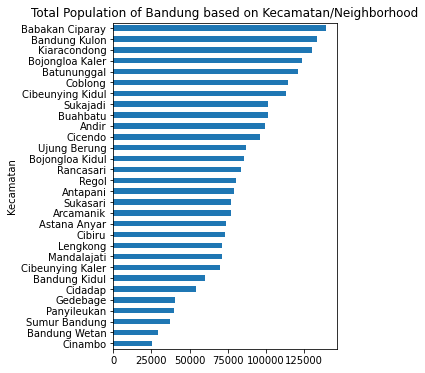

In [66]:
bdg_pop_kec = bdg_pop.groupby('Kecamatan').sum()
bdg_pop_kec.sum(axis = 1).sort_values().plot(kind='barh', figsize=(4,6), 
                                             title = "Total Population of Bandung based on Kecamatan/Neighborhood")

According to the plot above, Babakan Ciparay has the most population among all the Kecamatans in Bandung. Now let's see which age category has the most populations in Bandung, with original and newer age groups.

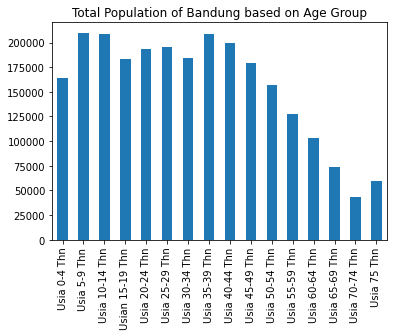

In [113]:
# Population based on original age groups
bdg_pop_kec.sum(axis = 0).plot(kind='bar', title = "Total Population of Bandung based on Age Group")

In [114]:
# Population based on new age groups

bdg_agegroup = []

for i, kec in bdg_pop_kec.iterrows():
    children = kec['Usia 0-4 Thn'] + kec['Usia 5-9 Thn']
    teenagers = kec['Usia 10-14 Thn'] + kec['Usian 15-19 Thn']
    youngadults = kec['Usia 20-24 Thn'] + kec['Usia 25-29 Thn']
    adults = kec['Usia 30-34 Thn'] + kec['Usia 35-39 Thn'] + kec['Usia 40-44 Thn'] + kec['Usia 45-49 Thn'] 
    seniorAdults = kec['Usia 50-54 Thn'] + kec['Usia 55-59 Thn'] + kec['Usia 60-64 Thn'] + kec['Usia 65-69 Thn'] + kec['Usia 70-74 Thn'] + kec['Usia 75 Thn']
    bdg_agegroup.append({'Kecamatan': 'Kecamatan '+ i, 'Children': children, 'Teenagers': teenagers, 
                         'Young Adults': youngadults, 'Adults': adults,
                         'Senior Adults': seniorAdults})
    
bdg_agegroup = pd.DataFrame(bdg_agegroup)


In [115]:
bdg_agegroup.head()

,Kecamatan,Children,Teenagers,Young Adults,Adults,Senior Adults
0,Kecamatan Andir,14229,15590,14985,30501,24073
1,Kecamatan Antapani,12081,10991,12515,24584,18646
2,Kecamatan Arcamanik,11986,11900,12110,23970,16947
3,Kecamatan Astana Anyar,10297,11278,10804,22669,19001
4,Kecamatan Babakan Ciparay,22853,22616,22485,44321,27099


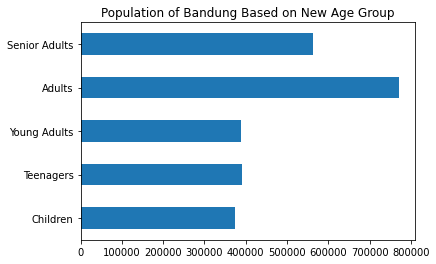

In [116]:
bdg_agegroup.drop('Kecamatan', axis = 1).sum(axis = 0).plot(kind = 'barh', 
                                                            title = "Population of Bandung Based on New Age Group")

According to the charts above, Bandung is dominated with Adults age group (30-49 years old), followed by Senior Adults (above and equal to 50 years old). 
In other words, Bandung has big potential for coffee shops expansion, since the number of populations of Adult & Young Adult is quite high.

Adults have the purchasing power and some of young adults may have too, but they have the eagerness to spend time and money in the coffee shop. This supports the idea to include number of populations from certain groups to the analysis.

## B. Exploratory Data Analysis of Foursquare API Dataset

### i. Extracting Data from Foursquare API

In this part, the venues per Kecamatan will be retrieved using Foursquare API. First, we will retrieve the coordinate of each Kecamatan through geocoder. The coordinate of Bandung will also be retrieved

In [117]:
# function to retrieve coordinates
def get_ll(neighborhood):
    # initialize your variable to None
    ll_coords = None
    # loop until you get the coordinates
    while(ll_coords is None):
        g = geocoder.arcgis('{}, Bandung, Indonesia'.format(neighborhood))
        ll_coords = g.latlng
    return ll_coords

# Initialising new list
kec_df = []

# Looping through the names of Kecamatan in bdg_agegroup
# to get the coordinates
for k in bdg_agegroup['Kecamatan']:
    ll = get_ll(k)
    kec_df.append({'Kecamatan': k, 'Lat':ll[0], 'Lng':ll[1] })

# Converting the list to DataFrame
kec_df = pd.DataFrame(kec_df)
kec_df.head()

,Kecamatan,Lat,Lng
0,Kecamatan Andir,-6.91390,107.57435
1,Kecamatan Antapani,-6.90389,107.66424
2,Kecamatan Arcamanik,-6.91333,107.68000
3,Kecamatan Astana Anyar,-6.93198,107.59965
4,Kecamatan Babakan Ciparay,-6.94393,107.57887


In [118]:
# Credentials for Foursquare API

CLIENT_ID = '3H5SN3042TTHUSASL2EJF0BBMBDEUXNPVPFI3YX4BOUNDSXW' # your Foursquare ID
CLIENT_SECRET = 'RSBHZ1HFBVKLBCBKDH1FIDYKCBW5C0OVLL0EMWZPNP0UHBRJ' # your Foursquare Secret
VERSION = '20210731'
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 3H5SN3042TTHUSASL2EJF0BBMBDEUXNPVPFI3YX4BOUNDSXW
CLIENT_SECRET:RSBHZ1HFBVKLBCBKDH1FIDYKCBW5C0OVLL0EMWZPNP0UHBRJ


In [120]:
# Retrieving Venues for each Kecamatan

radius = 3000
LIMIT = 100

venues = []

for idx, row in kec_df.iterrows():
    
    #print(row)
    lat = row['Lat']
    long = row['Lng']
    neighborhood = row['Kecamatan']

    # create the API request URL
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
            neighborhood,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [121]:
# convert the venues list into a new DataFrame
venues_df = pd.DataFrame(venues)

# define the column names
venues_df.columns = ['Kecamatan', 'Latitude', 'Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

print(venues_df.shape)
venues_df.head(10)

(2501, 7)


,Kecamatan,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,Kecamatan Andir,-6.9139,107.57435,Noah's Barn Coffeenery,-6.914821,107.577483,Coffee Shop
1,Kecamatan Andir,-6.9139,107.57435,West Point Hotel,-6.912569,107.577947,Hotel
2,Kecamatan Andir,-6.9139,107.57435,Bakmie Royal,-6.920586,107.579469,Noodle House
3,Kecamatan Andir,-6.9139,107.57435,Starbucks,-6.903986,107.579471,Coffee Shop
4,Kecamatan Andir,-6.9139,107.57435,Dapoer Pandan Wangi,-6.928557,107.581916,Sundanese Restaurant
5,Kecamatan Andir,-6.9139,107.57435,d`Groove Sport & Wellness Center,-6.920883,107.574669,Gym / Fitness Center
6,Kecamatan Andir,-6.9139,107.57435,23 Paskal,-6.915411,107.594286,Shopping Mall
7,Kecamatan Andir,-6.9139,107.57435,Domino's Pizza,-6.917921,107.581150,Pizza Place
8,Kecamatan Andir,-6.9139,107.57435,Yogya Sumbersari Junction (Suju),-6.931714,107.575693,Department Store
9,Kecamatan Andir,-6.9139,107.57435,UNIQLO (ユニクロ) (UNIQLO),-6.915225,107.594777,Clothing Store


In [78]:
# venues_df.to_csv('bdg_venues.csv', index=False)

### ii. Exploratory Data Analysis on The Venue Dataset

There are 2501 venues retrieved in total from Bandung. Now, let's explore the venues in more detail.

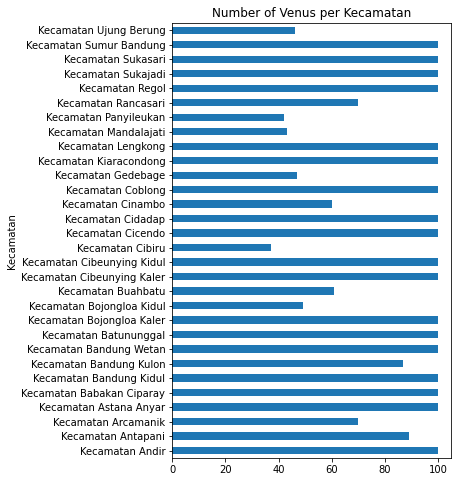

In [136]:
venues_df.groupby(["Kecamatan"]).count()['Latitude'].plot(kind='barh', 
                                                          title = 'Number of Venus per Kecamatan',
                                                          figsize=(5,8))

According to the table above, it seems that there are some more crowded Kecamatans, where, in terms of business/number of venues, they have 100 as maximum values. The others are less crowded. Meanwhile there are 167 unique categories of venues.

In [80]:
print('There are {} uniques categories.'.format(len(venues_df['VenueCategory'].unique())))

There are 167 uniques categories.


Indonesian Restaurant has been the most common venue categories among most of the Kecamatans in Bandung, followed by Hotels.

In [81]:
venues_df.groupby(['Neighborhood'])['VenueCategory'].agg(pd.Series.mode)

Neighborhood
Kecamatan Andir                                                           Hotel
Kecamatan Antapani                                            Convenience Store
Kecamatan Arcamanik                                           Convenience Store
Kecamatan Astana Anyar                                                    Hotel
Kecamatan Babakan Ciparay                                 Indonesian Restaurant
Kecamatan Bandung Kidul                                   Indonesian Restaurant
Kecamatan Bandung Kulon                                             Coffee Shop
Kecamatan Bandung Wetan                                                   Hotel
Kecamatan Batununggal                                                     Hotel
Kecamatan Bojongloa Kaler                                                 Hotel
Kecamatan Bojongloa Kidul                                          Noodle House
Kecamatan Buahbatu            [Asian Restaurant, Bakery, Café, Indonesian Re...
Kecamatan Cibeunying Kaler 

Meanwhile, in terms of number of venues per category, Hotel is the most common venues, followed by Coffee Shop and Indonesian Restaurant.

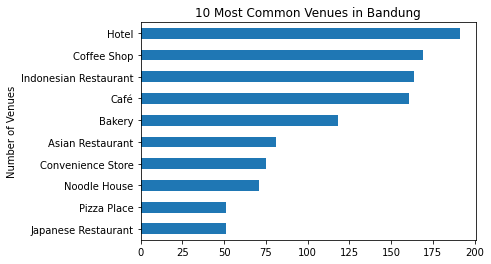

In [129]:
venues_df['VenueCategory'].value_counts()[:10].sort_values().plot(kind='barh', 
                                                    xlabel = 'Number of Venues', 
                                                    ylabel = 'Type of Venues',
                                                    title = '10 Most Common Venues in Bandung')

## C. Machine Learning Algorithms Used

In this project, we will discover Kecamatans in Bandung that are suitable for people who want to expand their business in coffee shops, by using K-Means clustering with the features of number of existing coffee shops and total populations of adults and young adults per Kecamatan.

The reason of selecting these features are that we want to minimize the possibilites of competitions in the same area and maximize the purchases by selecting areas having more people with higher possibilities in purchasing powers and eagerness to spend money or time in coffee shops, hence the young adults and adults. 

Features will be clustered into 3 groups by using K-Means. The reason of applying this algorithm is features are quite simple, so the process will be quicker yet easier to interpret.

# IV. Analysis & Results

## A. Pre-Processing

First, for every venue that has been retrieved, we will create one-hot encoding based on the venue type. Then, for each Kecamatan, we will count the average of each venue type.

In [139]:
# One hot encoding by venue type
onehot = pd.get_dummies(venues_df['VenueCategory'])
onehot['Kecamatan']= venues_df['Kecamatan']
fixed_columns = [onehot.columns[-1]] + list(onehot.columns[:-1])
onehot = onehot[fixed_columns]

# Calculating average of venue type per Kecamatan
bdg_grouped = onehot.groupby('Kecamatan').mean().reset_index()
bdg_grouped.head()

,Kecamatan,African Restaurant,Airport,Airport Lounge,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bakery,Balinese Restaurant,Bar,Basketball Stadium,Bathing Area,Bed & Breakfast,Beer Garden,Bistro,Bookstore,Boutique,Breakfast Spot,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Business Service,Café,Camera Store,Campground,Car Wash,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Cafeteria,College Library,College Stadium,Comfort Food Restaurant,Community Center,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Cupcake Shop,Dance Studio,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop,Eastern European Restaurant,Event Space,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Flea Market,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden Center,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Health & Beauty Service,High School,Historic Site,Hostel,Hotel,Hotel Bar,Housing Development,Ice Cream Shop,Indonesian Meatball Place,Indonesian Restaurant,Internet Cafe,Japanese Restaurant,Javanese Restaurant,Jazz Club,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Luggage Store,Market,Martial Arts School,Massage Studio,Medical Center,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Motel,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music School,Music Store,Music Venue,Nature Preserve,Nightclub,Noodle House,Office,Other Great Outdoors,Padangnese Restaurant,Park,Pastry Shop,Performing Arts Venue,Pet Store,Pharmacy,Photography Studio,Pizza Place,Playground,Plaza,Pool,Radio Station,Recreation Center,Resort,Rest Area,Restaurant,Salon / Barbershop,Sandwich Place,Satay Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shoe Store,Shopping Mall,Snack Place,Soccer Field,Soccer Stadium,Soup Place,Spa,Steakhouse,Sundanese Restaurant,Supermarket,Sushi Restaurant,Tailor Shop,Tattoo Parlor,Tea Room,Tech Startup,Thai Restaurant,Theater,Theme Park,Toy / Game Store,Train Station,Turkish Restaurant,Udon Restaurant,University,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wings Joint,Women's Store
0,Kecamatan Andir,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.020000,0.000000,0.010000,0.0,0.040000,0.01,0.0,0.000000,0.0,0.0,0.02,0.0,0.000000,0.0,0.020000,0.0,0.00,0.0,0.0,0.01,0.0,0.030000,0.0,0.0,0.00,0.040000,0.020000,0.0,0.070000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.020000,0.0,0.00,0.0,0.000000,0.020000,0.0,0.000000,0.01,0.0,0.000000,0.01,0.0,0.0,0.01,0.000000,0.0,0.0,0.00,0.030000,0.010000,0.0,0.01,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.010000,0.0,0.0,0.00,0.00,0.0,0.110000,0.00,0.0,0.0,0.010000,0.080000,0.000000,0.04,0.01,0.000000,0.01,0.010000,0.0,0.00,0.0,0.000000,0.00,0.01,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.010000,0.02,0.00,0.0,0.0,0.0,0.0,0.0,0.060000,0.0,0.0,0.01,0.000000,0.0,0.000000,0.00,0.000000,0.0,0.010000,0.0,0.000000,0.000000,0.0,0.0,0.00,0.0,0.000000,0.00,0.0,0.01,0.000000,0.0,0.0,0.03,0.040000,0.0,0.000000,0.01,0.010000,0.01,0.02,0.010000,0.01,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.01,0.01,0.0,0.01,0.000000,0.0,0.0,0.0,0.0,0.01,0.0
1,Kecamatan Antapani,0.0,0.0,0.0,0.0,0.022472,0.0,0.0,0.0,0.022472,0.011236,0.022472,0.0,0.044944,0.00,0.0,0.011236,0.0,0.0,0.00,0.0,0.000000,0.0,0.011236,0.0,0.00,0.0,0.0,0.00,0.0,0.067416,0.0,0.0,0.00,0.011236,0.000000,0.0,0.011236,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.146067,0.0,0.00,0.0,0.011236,0.033708,0.0,0.011236,0.00,0.0,0.022472,0.00,0.0,0.0,0.00,0.011236,0.0,0.0,0.00,0.011236,0.033708,0.0,0.00,0.0,0.0,0.022472,0.0,0.011236,0.044944,0.0,0.011236,0.0,0.0,0.00,0.00,0.0,0.022472,0.00,0.0,0.0,0.044944,0.044944,0.011236,0.00,0.00,0.011236,0.00,0.011236,0.0,0.00,0.0,0.011236,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.056180,0.0,0.0,0.00,0.000000,

Next, a function is created to return the 10 most common venues.

In [140]:
# Function to return n most common venues
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Kecamatan']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Kecamatan'] = bdg_grouped['Kecamatan']

# Retrieve 10 most common venues per Kecamatam
for ind in np.arange(bdg_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bdg_grouped.iloc[ind, :], num_top_venues)

In [141]:
neighborhoods_venues_sorted

,Kecamatan,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Kecamatan Andir,Hotel,Indonesian Restaurant,Coffee Shop,Noodle House,Bakery,Japanese Restaurant,Snack Place,Chinese Restaurant,Shopping Mall,Café
1,Kecamatan Antapani,Convenience Store,Café,Noodle House,Indonesian Restaurant,Grocery Store,Bakery,Indonesian Meatball Place,Department Store,Pizza Place,Food Truck
2,Kecamatan Arcamanik,Convenience Store,Grocery Store,Noodle House,Indonesian Restaurant,Café,Donut Shop,Department Store,Indonesian Meatball Place,Bakery,Pizza Place
3,Kecamatan Astana Anyar,Hotel,Coffee Shop,Indonesian Restaurant,Noodle House,Bakery,Snack Place,Café,Asian Restaurant,Sundanese Restaurant,Chinese Restaurant
4,Kecamatan Babakan Ciparay,Indonesian Restaurant,Convenience Store,Café,Pizza Place,Coffee Shop,Hotel,Bakery,Donut Shop,Steakhouse,BBQ Joint
5,Kecamatan Bandung Kidul,Indonesian Restaurant,Café,Asian Restaurant,Convenience Store,Pizza Place,Coffee Shop,Arcade,Japanese Restaurant,Supermarket,Hotel
6,Kecamatan Bandung Kulon,Coffee Shop,Café,Indonesian Restaurant,Chinese Restaurant,Department Store,Noodle House,Hotel,Snack Place,Asian Restaurant,Pizza Place
7,Kecamatan Bandung Wetan,Hotel,Coffee Shop,Bakery,Café,Indonesian Restaurant,Shopping Mall,Asian Restaurant,Bookstore,Clothing Store,Fast Food Restaurant
8,Kecamatan Batununggal,Hotel,Indonesian Restaurant,Bakery,Coffee Shop,Café,Seafood Restaurant,Boutique,Sundanese Restaurant,Bed & Breakfast,Food Truck
9,Kecamatan Bojongloa Kaler,Hotel,Coffee Shop,Chinese Restaurant,Noodle House,Snack Place,Bakery,Café,Asian Restaurant,Indonesian Restaurant,Food Court


We can confirm that dining places and hotels are the most common venues in Bandung.

## B. Clustering

Now, it is time to merge the processed population data set and venues for clustering.

In [194]:
# Only take the Kecamatan and Average Amount of Coffee Shops
bdg_coffee = bdg_grouped[['Kecamatan', 'Coffee Shop']]

# Merge it with the selected age group per Kematan
bdg_coffee = bdg_coffee.merge(bdg_agegroup[['Kecamatan', 'Young Adults', 'Adults']], on = 'Kecamatan')

# Scale the Number of Populations

from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()
bdg_coffee['Young Adults'] = mm_scaler.fit_transform(bdg_coffee['Young Adults'].values.reshape(-1, 1))
bdg_coffee['Adults'] = mm_scaler.fit_transform(bdg_coffee['Adults'].values.reshape(-1, 1))

In [195]:
# Setting the number of clusters
kclusters = 3

# Run k-means clustering algorithm
kmeans = KMeans(n_clusters=kclusters,random_state=0).fit(bdg_coffee.drop(["Kecamatan"], 1))

In [196]:
# Assigning labels to each Kecamatan
bdg_coffee['Cluster Labels']= kmeans.labels_

# Merge with dataset wit coordinates and rearrange the columns
bdg_result = bdg_coffee.merge(kec_df, on='Kecamatan')

columns = ['Kecamatan', 'Cluster Labels', 'Lat', 'Lng', 'Coffee Shop', 
           'Young Adults', 'Adults']
bdg_result = bdg_result[columns]

Preparation for plotting map and clusters

In [197]:
# Get the coordinates of Bandung
address = 'Bandung, Indonesia'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
bdg_latitude = location.latitude
bdg_longitude = location.longitude
print('The geograpical coordinate of Bandung, Indonesia {}, {}.'.format(bdg_latitude, bdg_longitude))

# create map
map_clusters = folium.Map(location=[bdg_latitude, bdg_longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
ia=0

for idx, row in bdg_result.iterrows():
    cluster = int(row['Cluster Labels'])
    lat = row['Lat']
    lon = row['Lng']
    poi = row['Kecamatan']

    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

The geograpical coordinate of Bandung, Indonesia -6.9344694, 107.6049539.


In [198]:
# Merge with 10 most common venues dataframe
bdg_result = bdg_result.merge(neighborhoods_venues_sorted, on ='Kecamatan')

Below are the charateristic on each clusters.

In [199]:
# Conditions on Cluster 0
bdg_result.loc[bdg_result['Cluster Labels'] == 0, bdg_result.columns[[0] + list(range(5, bdg_result.shape[1]))]]

,Kecamatan,Young Adults,Adults,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Kecamatan Andir,0.589805,0.618927,Hotel,Indonesian Restaurant,Coffee Shop,Noodle House,Bakery,Japanese Restaurant,Snack Place,Chinese Restaurant,Shopping Mall,Café
1,Kecamatan Antapani,0.454715,0.455771,Convenience Store,Café,Noodle House,Indonesian Restaurant,Grocery Store,Bakery,Indonesian Meatball Place,Department Store,Pizza Place,Food Truck
2,Kecamatan Arcamanik,0.432564,0.438841,Convenience Store,Grocery Store,Noodle House,Indonesian Restaurant,Café,Donut Shop,Department Store,Indonesian Meatball Place,Bakery,Pizza Place
3,Kecamatan Astana Anyar,0.361135,0.402967,Hotel,Coffee Shop,Indonesian Restaurant,Noodle House,Bakery,Snack Place,Café,Asian Restaurant,Sundanese Restaurant,Chinese Restaurant
5,Kecamatan Bandung Kidul,0.289105,0.296504,Indonesian Restaurant,Café,Asian Restaurant,Convenience Store,Pizza Place,Coffee Shop,Arcade,Japanese Restaurant,Supermarket,Hotel
10,Kecamatan Bojongloa Kidul,0.498851,0.537308,Noodle House,Indonesian Restaurant,Café,Bakery,Coffee Shop,Hotel,Sundanese Restaurant,Asian Restaurant,Chinese Restaurant,Multiplex
12,Kecamatan Cibeunying Kaler,0.365401,0.377709,Hotel,Café,Coffee Shop,Bakery,Indonesian Restaurant,Steakhouse,Asian Restaurant,Massage Studio,Bookstore,Sundanese Restaurant
14,Kecamatan Cibiru,0.431470,0.403381,Café,Department Store,Supermarket,Indonesian Restaurant,Fried Chicken Joint,Hotel,Food Truck,Sundanese Restaurant,Steakhouse,Fast Food Restaurant
15,Kecamatan Cicendo,0.568858,0.589919,Hotel,Coffee Shop,Indonesian Restaurant,Café,Bakery,Clothing Store,Chinese Restaurant,Japanese Restaurant,Noodle House,Snack Place
21,Kecamatan Lengkong,0.356049,0.359786,Indonesian Restaurant,Hotel,Bakery,Coffee Shop,Café,Noodle House,Japanese Restaurant,Sundanese Restaurant,Sushi Restaurant,Bookstore


In [200]:
# Conditions on Cluster 1
bdg_result.loc[bdg_result['Cluster Labels'] == 1, bdg_result.columns[[0] + list(range(5, bdg_result.shape[1]))]]

,Kecamatan,Young Adults,Adults,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Kecamatan Babakan Ciparay,1.000000,1.000000,Indonesian Restaurant,Convenience Store,Café,Pizza Place,Coffee Shop,Hotel,Bakery,Donut Shop,Steakhouse,BBQ Joint
6,Kecamatan Bandung Kulon,0.965434,0.965064,Coffee Shop,Café,Indonesian Restaurant,Chinese Restaurant,Department Store,Noodle House,Hotel,Snack Place,Asian Restaurant,Pizza Place
8,Kecamatan Batununggal,0.808248,0.796090,Hotel,Indonesian Restaurant,Bakery,Coffee Shop,Café,Seafood Restaurant,Boutique,Sundanese Restaurant,Bed & Breakfast,Food Truck
9,Kecamatan Bojongloa Kaler,0.821757,0.843628,Hotel,Coffee Shop,Chinese Restaurant,Noodle House,Snack Place,Bakery,Café,Asian Restaurant,Indonesian Restaurant,Food Court
11,Kecamatan Buahbatu,0.657351,0.642420,Asian Restaurant,Café,Indonesian Restaurant,Bakery,Hotel,Pizza Place,Coffee Shop,Food Truck,Fast Food Restaurant,Convenience Store
13,Kecamatan Cibeunying Kidul,0.706191,0.738736,Coffee Shop,Bakery,Café,Hotel,Steakhouse,Indonesian Restaurant,Asian Restaurant,Massage Studio,Japanese Restaurant,Restaurant
18,Kecamatan Coblong,0.726099,0.752661,Hotel,Café,Asian Restaurant,Coffee Shop,Bakery,Indonesian Restaurant,Japanese Restaurant,Camera Store,Grocery Store,Bubble Tea Shop
20,Kecamatan Kiaracondong,0.887114,0.891138,Indonesian Restaurant,Café,Pizza Place,Hotel,Coffee Shop,Fast Food Restaurant,Arcade,Asian Restaurant,Steakhouse,Convenience Store
26,Kecamatan Sukajadi,0.625738,0.652098,Coffee Shop,Hotel,Café,Japanese Restaurant,Clothing Store,Shopping Mall,Asian Restaurant,Indonesian Restaurant,Chinese Restaurant,Bakery


In [201]:
# Conditions on Cluster 2
bdg_result.loc[bdg_result['Cluster Labels'] == 2, bdg_result.columns[[0] + list(range(5, bdg_result.shape[1]))]]

,Kecamatan,Young Adults,Adults,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Kecamatan Bandung Wetan,0.000000,0.019357,Hotel,Coffee Shop,Bakery,Café,Indonesian Restaurant,Shopping Mall,Asian Restaurant,Bookstore,Clothing Store,Fast Food Restaurant
16,Kecamatan Cidadap,0.229107,0.235014,Coffee Shop,Hotel,Café,Asian Restaurant,Indonesian Restaurant,Clothing Store,Supermarket,Other Great Outdoors,Bookstore,Japanese Restaurant
17,Kecamatan Cinambo,0.000766,0.000000,Convenience Store,Café,Indonesian Restaurant,Department Store,Food Truck,Supermarket,Donut Shop,Asian Restaurant,Seafood Restaurant,Bakery
19,Kecamatan Gedebage,0.109877,0.135306,Indonesian Restaurant,Pizza Place,Rest Area,Fast Food Restaurant,Department Store,Convenience Store,Food Court,Hotel,Supermarket,Food Truck
23,Kecamatan Panyileukan,0.164898,0.089285,Café,Convenience Store,Fried Chicken Joint,Indonesian Restaurant,Donut Shop,Grocery Store,Department Store,Supermarket,Pizza Place,Movie Theater
28,Kecamatan Sumur Bandung,0.087672,0.085948,Hotel,Bakery,Coffee Shop,Café,Steakhouse,Indonesian Restaurant,Indonesian Meatball Place,Hotel Bar,Seafood Restaurant,Restaurant


In [208]:
unique_elements, counts_elements = np.unique(kmeans.labels_, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[ 0  1  2]
 [15  9  6]]


## C. Result

According to the result above, Cluster 0 has the most Kecamatans and Cluster 2 has the least ones. Most of the Kecamatans in Cluster 2 are located in the eastern Bandung, while Cluster 1 tends to be located in central-western Bandung.
Meanwhile Cluster 0 is spread around the city.

Looking at the number of populations of targetted people, it seems that Cluster 2 has the least number of people. Cluster 1 has the highest number of young adults and adults, meanwhile Cluster 2 has moderate numbers of these type of people.

Below is the summary of number of Kecamatans which have coffee shops as the 3 top common places. Cluster 0 has the most number of Kecamatans that have coffee shops in the top 3 most common venues. 

| Cluster     | 1st | 2nd | 3rd |
| ----------- | --- | --- | --- |
| 0           | 2 | 2 | 2 |
| 1           | 3 | 1 | 0 |
| 2           | 1 | 1 | 1 |

# IV. Discussion



It can be concluded that the clusters are clearly built based on the total of populations first, then followed by the number of coffee shops.

For recommendation of where to build new coffee shops, people should choose Kecamatans in Cluster 1, since this cluster has the highest rate of adults & young adults, and lower amount of coffee shops as most common venues.

If to be detailed, I would further recommend the Kecamatans also based on location near the city center/most visited place or from cluster 1. In Bandung, most hang out/visited places are located in city center towards the north.

Here are top 3 Kecamatans in cluster 1 for building new coffee shops:
1. Kiaracondong (targetted population is around 0.9, coffee shop is the 5th most common place)
2. Batununggal (targetted population is around 0.8, coffee shop is the 4th most common place)
3. Coblong (targetted population is around 0.73, coffee shop is the 4th most common place, region is often visited)

# V. Conclusion

Coffee shop is one example of top growing business in Indonesia that targets young adults and adults as the consumers. Bandung, the 4th biggest city in Indonesia is also an interesting target for businessmen/women who intends to expand their coffee shop business, since Bandung has supportive demographic of targetted customers. 

Using K-Means, neighborhoods or Kecamatans in Bandung are clustered into 3 clusters based on the total of targetted populations and number of coffee shops. The clusters derived from the K-Means are clearly built on the total targetted population first, in which the Cluster 1 has the highest rate of targetted population and also least amount of Kecamatans that have coffee shops as the most common venues. 

Kiaracondong, Batununggal, and Coblong are three recommended Kecamatans from Cluster 1, since they have the combination of highest rate of targetted population, amount of coffee shops, and also the location near the city center/most visited places.

My suggestions for further development are:
- Leveraging other dataset that contains income rate per Kecamatan, to add the knowledge on purchasing power
- Include data about location/Kecamatans with traffic jams rate, since this may affect delivery punctuality
- Numbers of ratings submitted to Google or ride hailing app, to give an insight on purchase rates in the area, or even the rating themselves can provide knowledge on where to compete easier.